## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/carbrand/Datasets/Train/*'
valid_path = '/content/drive/MyDrive/carbrand/Datasets/Test/*'


In [11]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [12]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [13]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/carbrand/Datasets/Train/*')

In [14]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [16]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [17]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/carbrand/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [21]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/carbrand/Datasets/Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [22]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================] - 33s 24s/step - loss: 6.2609 - accuracy: 0.3438 - val_loss: 4.1606 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 20s 14s/step - loss: 5.1853 - accuracy: 0.3750 - val_loss: 5.9302 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 19s 14s/step - loss: 7.3125 - accuracy: 0.3906 - val_loss: 3.2289 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 19s 14s/step - loss: 4.5722 - accuracy: 0.3594 - val_loss: 2.7762 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 19s 14s/step - loss: 2.5968 - accuracy: 0.4219 - val_loss: 5.9504 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 19s 14s/step - loss: 3.6918 - accuracy: 0.4062 - val_loss: 2.3447 - val_accuracy: 0.3448
Epoch 7/50
2/2 [==============================] - 19s 14s/step - loss: 1.6188 - accuracy: 0.5000 - val_loss: 1.7819 - val_accuracy: 0.5172
Epoch 8/50
2/2 [===========

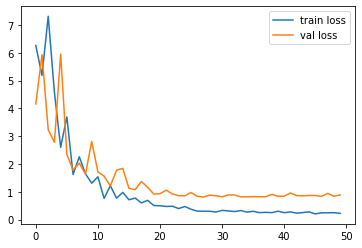

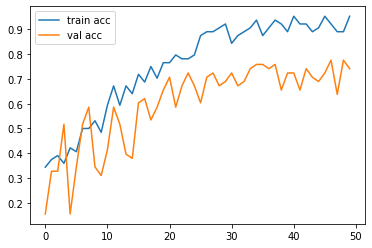

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [25]:

y_pred = model.predict(test_set)


In [26]:
y_pred

array([[2.53781006e-02, 7.15095550e-04, 9.73906815e-01],
       [6.05815761e-02, 7.13231564e-01, 2.26186872e-01],
       [1.13904198e-05, 3.37364065e-04, 9.99651194e-01],
       [8.46384585e-01, 1.11395344e-01, 4.22201529e-02],
       [4.74732442e-05, 9.98414278e-01, 1.53824990e-03],
       [1.98082700e-01, 5.00357687e-01, 3.01559657e-01],
       [1.45664001e-02, 5.09088933e-01, 4.76344615e-01],
       [2.28457972e-02, 5.69582079e-03, 9.71458375e-01],
       [4.89147156e-02, 1.97069556e-01, 7.54015684e-01],
       [9.31791123e-03, 4.68829691e-01, 5.21852434e-01],
       [8.91527254e-03, 7.90466964e-01, 2.00617671e-01],
       [3.38121243e-02, 6.08994305e-01, 3.57193530e-01],
       [9.48293880e-03, 9.04750228e-01, 8.57669041e-02],
       [1.47094848e-02, 6.82328820e-01, 3.02961677e-01],
       [8.85412004e-03, 6.73113624e-03, 9.84414816e-01],
       [5.07566566e-03, 7.73209631e-01, 2.21714675e-01],
       [1.11548239e-02, 3.81830454e-01, 6.07014716e-01],
       [2.76374947e-02, 4.50280

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model=load_model('model_resnet50.h5')

In [31]:
img_data

NameError: ignored

In [32]:
img=image.load_img('/content/drive/MyDrive/carbrand/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [33]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [34]:
x.shape

(224, 224, 3)

In [35]:
x=x/255

In [36]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

array([[0.00168475, 0.00507598, 0.9932393 ]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

In [42]:
a==2

array([ True])

In [ ]:
#model predict correctly as lamborghini